# 3.2 활성화 함수
## 3.2.2 계단 함수 구현하기

In [16]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [17]:
import numpy as np

def step_function(x):
    y = x >0
    return y.astype(np.int)

## 3.2.3 계단 함수의 그래프

(-0.1, 1.1)

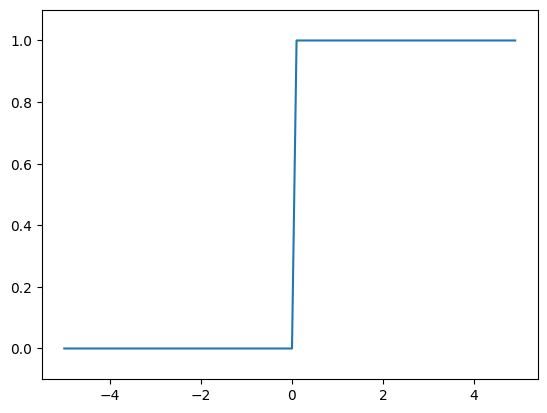

In [18]:
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0,dtype=int)

x = np.arange(-5.0, 5.0, 0.1) # -5.0에서 5.0까지 0.1 간격의 넘파이 배열
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) #y축 범위 지정
plt.show()


## 3.2.4 시그모이드 함수 구현하기

(-0.1, 1.1)

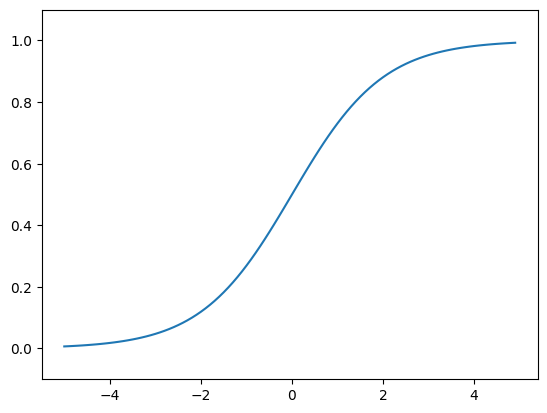

In [19]:
def sigmoid(x):
    return 1 / (1+ np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()


## 3.2.7 ReLU 함수

In [20]:
def relu(x):
    return np.maximum(0,x)


# 3.3 다차원 배열의 계산
## 3.3.1 다차원 배열

In [21]:
a = np.array([1,2,3,4])
a
np.ndim(a)
a.shape
a.shape[0]

array([1, 2, 3, 4])

1

(4,)

4

## 3.3.2 행렬의 곱

In [22]:
a = np.array([[1,2],[3,4]])
a.shape

b = np.array([[5,6], [7,8]])
b.shape

np.dot(a,b)

(2, 2)

(2, 2)

array([[19, 22],
       [43, 50]])

## 3.3.3 신경망에서의 행렬 곱

In [23]:
x = np.array([1,2])
x.shape

w = np.array([[1,3,5],[2,4,6]])
w
w.shape

y = np.dot(x,w)
y

(2,)

array([[1, 3, 5],
       [2, 4, 6]])

(2, 3)

array([ 5, 11, 17])

## 3.4.3 구현 정리

In [24]:
def identity_function(x): # 항등 함수
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network["b1"] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network["b2"] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network["b3"] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) +b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)    
    
    return y

network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

# 3.5 출력층 설계하기
## 3.5.1 항등함수와 소프트맥스 함수 구현하기

In [25]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y


In [26]:

a = np.array([1010,1000,990])
np.exp(a) / np.sum(np.exp(a)) # stackoverflow

c = np.max(a)
a - c 

np.exp(a-c) / np.sum(np.exp(a-c)) # 해결책: 분모와 분자에 같은 값을 빼준다.

C:\Users\admin\AppData\Local\Temp\ipykernel_35780\4280518944.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) # stackoverflow
C:\Users\admin\AppData\Local\Temp\ipykernel_35780\4280518944.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a)) # stackoverflow


array([nan, nan, nan])

array([  0, -10, -20])

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [27]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y


a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

y

np.sum(y)

array([0.01821127, 0.24519181, 0.73659691])

np.float64(1.0)

# 3.6 손글씨 숫자 인식
## 3.6.1 MNIST 데이터셋

밑바닥부터 시작하는 딥러닝 깃헙에서 데이터셋을 불러올 수 없어, 캐글에서 가져옴. 

In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

c:\Users\admin\deeplearning-from-scratch\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 22.0M/22.0M [00:02<00:00, 9.20MB/s]

Extracting files...


Path to dataset files: C:\Users\admin\.cache\kagglehub\datasets\hojjatk\mnist-dataset\versions\1


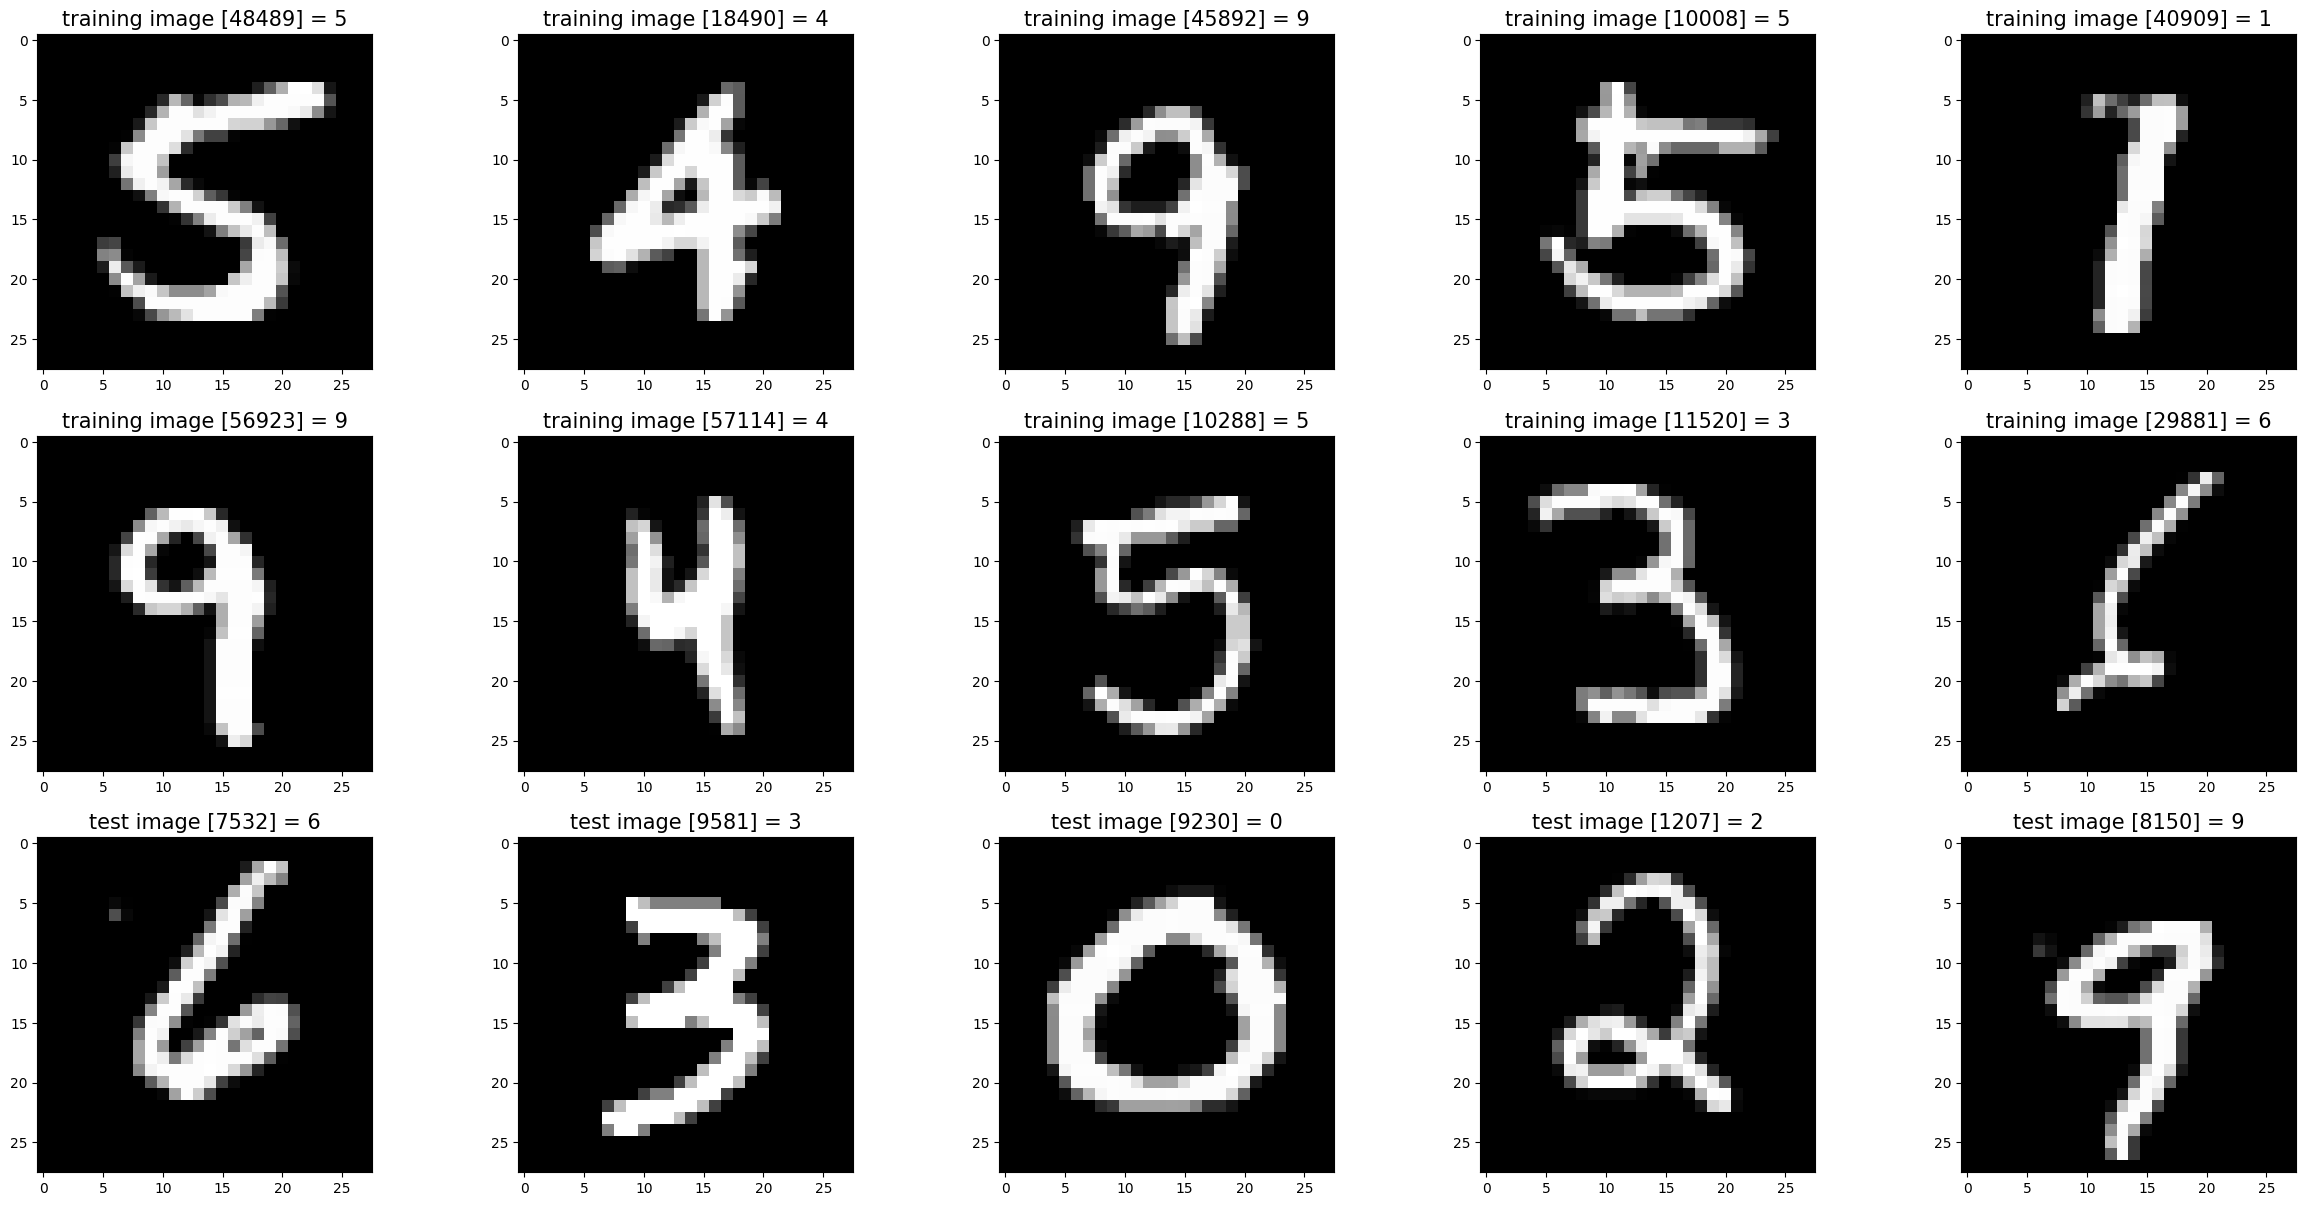

In [29]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = path
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1
#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

## 3.6.2 신경망의 추론 처리 (수정된 코드)

학습 없이 추론만 있기에 미학습된 초기 가중치로는 정확도가 떨어진다.

In [30]:
import sys, os


(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y


def min_max_norm(arr):
    min_val = np.min(arr)
    max_val = np.max(arr)
    return (arr - min_val) / (max_val - min_val)


def xavier_normal(n_in, n_out): # xavier 가중치 초기화 
    return np.random.randn(n_in, n_out) * np.sqrt(1 / n_in)


def init_network():
    network = {}
    network["W1"] = xavier_normal(784, 100)
    network["b1"] = np.random.rand(100)
    network["W2"] = xavier_normal(100, 50)
    network["b2"] = np.random.rand(50)
    network["W3"] = xavier_normal(50, 10)
    network["b3"] = np.random.rand(10)

    return network


def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    

    a1 = np.dot(x, W1) + b1
    # print(a1)
    z1 = sigmoid(a1)
    # print(z1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    # y = identity_function(a3)
    y = softmax(a3)
    # print(y)

    return y

network = init_network()
accuracy_cnt = 0


for x_data, y_data in zip(x_test, y_test):

    y = forward(network=network, x=min_max_norm(np.array(x_data).flatten()))

    y = np.argmax(y)
    # print("guessed: ",y)
    # print("answer: ",y_data)
    if y_data == y:
        accuracy_cnt +=1

print("Accuracy: ", accuracy_cnt/len(x_test))

Accuracy:  0.1009


## 3.6.3 배치 처리

In [31]:
x_test = min_max_norm(np.array(x_test).reshape((10000,-1)))

In [32]:
batch_size = 100

for i in range(0, len(x), batch_size):
    x_batch = x_test[i:i+batch_size]
    y_batch = forward(network, x_batch)

    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == y_test[i:i+batch_size])

print("Accuracy: ", accuracy_cnt / len(x_test))

Accuracy:  0.102
